# DonorsChoose

<p>
DonorsChoose.org receives hundreds of thousands of project proposals each year for classroom projects in need of funding. Right now, a large number of volunteers is needed to manually screen each submission before it's approved to be posted on the DonorsChoose.org website.
</p>
<p>
    Next year, DonorsChoose.org expects to receive close to 500,000 project proposals. As a result, there are three main problems they need to solve:
<ul>
<li>
    How to scale current manual processes and resources to screen 500,000 projects so that they can be posted as quickly and as efficiently as possible</li>
    <li>How to increase the consistency of project vetting across different volunteers to improve the experience for teachers</li>
    <li>How to focus volunteer time on the applications that need the most assistance</li>
    </ul>
</p>    
<p>
The goal of the competition is to predict whether or not a DonorsChoose.org project proposal submitted by a teacher will be approved, using the text of project descriptions as well as additional metadata about the project, teacher, and school. DonorsChoose.org can then use this information to identify projects most likely to need further review before approval.
</p>

## About the DonorsChoose Data Set

The `train.csv` data set provided by DonorsChoose contains the following features:

Feature | Description 
----------|---------------
**`project_id`** | A unique identifier for the proposed project. **Example:** `p036502`   
**`project_title`**    | Title of the project. **Examples:**<br><ul><li><code>Art Will Make You Happy!</code></li><li><code>First Grade Fun</code></li></ul> 
**`project_grade_category`** | Grade level of students for which the project is targeted. One of the following enumerated values: <br/><ul><li><code>Grades PreK-2</code></li><li><code>Grades 3-5</code></li><li><code>Grades 6-8</code></li><li><code>Grades 9-12</code></li></ul>  
 **`project_subject_categories`** | One or more (comma-separated) subject categories for the project from the following enumerated list of values:  <br/><ul><li><code>Applied Learning</code></li><li><code>Care &amp; Hunger</code></li><li><code>Health &amp; Sports</code></li><li><code>History &amp; Civics</code></li><li><code>Literacy &amp; Language</code></li><li><code>Math &amp; Science</code></li><li><code>Music &amp; The Arts</code></li><li><code>Special Needs</code></li><li><code>Warmth</code></li></ul><br/> **Examples:** <br/><ul><li><code>Music &amp; The Arts</code></li><li><code>Literacy &amp; Language, Math &amp; Science</code></li>  
  **`school_state`** | State where school is located ([Two-letter U.S. postal code](https://en.wikipedia.org/wiki/List_of_U.S._state_abbreviations#Postal_codes)). **Example:** `WY`
**`project_subject_subcategories`** | One or more (comma-separated) subject subcategories for the project. **Examples:** <br/><ul><li><code>Literacy</code></li><li><code>Literature &amp; Writing, Social Sciences</code></li></ul> 
**`project_resource_summary`** | An explanation of the resources needed for the project. **Example:** <br/><ul><li><code>My students need hands on literacy materials to manage sensory needs!</code</li></ul> 
**`project_essay_1`**    | First application essay<sup>*</sup>  
**`project_essay_2`**    | Second application essay<sup>*</sup> 
**`project_essay_3`**    | Third application essay<sup>*</sup> 
**`project_essay_4`**    | Fourth application essay<sup>*</sup> 
**`project_submitted_datetime`** | Datetime when project application was submitted. **Example:** `2016-04-28 12:43:56.245`   
**`teacher_id`** | A unique identifier for the teacher of the proposed project. **Example:** `bdf8baa8fedef6bfeec7ae4ff1c15c56`  
**`teacher_prefix`** | Teacher's title. One of the following enumerated values: <br/><ul><li><code>nan</code></li><li><code>Dr.</code></li><li><code>Mr.</code></li><li><code>Mrs.</code></li><li><code>Ms.</code></li><li><code>Teacher.</code></li></ul>  
**`teacher_number_of_previously_posted_projects`** | Number of project applications previously submitted by the same teacher. **Example:** `2` 

<sup>*</sup> See the section <b>Notes on the Essay Data</b> for more details about these features.

Additionally, the `resources.csv` data set provides more data about the resources required for each project. Each line in this file represents a resource required by a project:

Feature | Description 
----------|---------------
**`id`** | A `project_id` value from the `train.csv` file.  **Example:** `p036502`   
**`description`** | Desciption of the resource. **Example:** `Tenor Saxophone Reeds, Box of 25`   
**`quantity`** | Quantity of the resource required. **Example:** `3`   
**`price`** | Price of the resource required. **Example:** `9.95`   

**Note:** Many projects require multiple resources. The `id` value corresponds to a `project_id` in train.csv, so you use it as a key to retrieve all resources needed for a project:

The data set contains the following label (the value you will attempt to predict):

Label | Description
----------|---------------
`project_is_approved` | A binary flag indicating whether DonorsChoose approved the project. A value of `0` indicates the project was not approved, and a value of `1` indicates the project was approved.

### Notes on the Essay Data

<ul>
Prior to May 17, 2016, the prompts for the essays were as follows:
<li>__project_essay_1:__ "Introduce us to your classroom"</li>
<li>__project_essay_2:__ "Tell us more about your students"</li>
<li>__project_essay_3:__ "Describe how your students will use the materials you're requesting"</li>
<li>__project_essay_3:__ "Close by sharing why your project will make a difference"</li>
</ul>


<ul>
Starting on May 17, 2016, the number of essays was reduced from 4 to 2, and the prompts for the first 2 essays were changed to the following:<br>
<li>__project_essay_1:__ "Describe your students: What makes your students special? Specific details about their background, your neighborhood, and your school are all helpful."</li>
<li>__project_essay_2:__ "About your project: How will these materials make a difference in your students' learning and improve their school lives?"</li>
<br>For all projects with project_submitted_datetime of 2016-05-17 and later, the values of project_essay_3 and project_essay_4 will be NaN.
</ul>


In [1]:
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

import sqlite3
import pandas as pd
import numpy as np
import nltk
import string
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
from nltk.stem.porter import PorterStemmer

import re
# Tutorial about Python regular expressions: https://pymotw.com/2/re/
import string
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer

from gensim.models import Word2Vec
from gensim.models import KeyedVectors
import pickle

from tqdm import tqdm
import os

from plotly import plotly
import plotly.offline as offline
import plotly.graph_objs as go
offline.init_notebook_mode()
from collections import Counter

## 1.1 Reading Data

In [2]:
project_data = pd.read_csv('F:/aai/code/Assignments_DonorsChoose_2018/donors dataset/train_data_sample3.csv')
resource_data = pd.read_csv('F:/aai/code/Assignments_DonorsChoose_2018/donors dataset/resources_data_sample3.csv')

In [3]:
print("Number of data points in train data", project_data.shape)
print('-'*50)
print("The attributes of data :", project_data.columns.values)

Number of data points in train data (1075, 17)
--------------------------------------------------
The attributes of data : ['Unnamed: 0' 'id' 'teacher_id' 'teacher_prefix' 'school_state'
 'project_submitted_datetime' 'project_grade_category'
 'project_subject_categories' 'project_subject_subcategories'
 'project_title' 'project_essay_1' 'project_essay_2' 'project_essay_3'
 'project_essay_4' 'project_resource_summary'
 'teacher_number_of_previously_posted_projects' 'project_is_approved']


In [4]:
# how to replace elements in list python: https://stackoverflow.com/a/2582163/4084039
cols = ['Date' if x=='project_submitted_datetime' else x for x in list(project_data.columns)]


#sort dataframe based on time pandas python: https://stackoverflow.com/a/49702492/4084039
project_data['Date'] = pd.to_datetime(project_data['project_submitted_datetime'])
project_data.drop('project_submitted_datetime', axis=1, inplace=True)
project_data.sort_values(by=['Date'], inplace=True)


# how to reorder columns pandas python: https://stackoverflow.com/a/13148611/4084039
project_data = project_data[cols]


project_data.head(2)

Unnamed: 0       id                        teacher_id teacher_prefix  \
771      152643  p177457  ad31548c7ee6f5da24efaa7cc81bcf22            Ms.   
478       29397  p204706  a75f3ebb24f86c7b98ffb6370407f654           Mrs.   

    school_state                          Date project_grade_category  \
771           SC 1970-01-01 00:00:00.000042487          Grades PreK-2   
478           UT 1970-01-01 00:00:00.000042487          Grades PreK-2   

    project_subject_categories   project_subject_subcategories  \
771        Literacy & Language  Literacy, Literature & Writing   
478        Literacy & Language       ESL, Literature & Writing   

                                        project_title  \
771  Open Our Eyes to the World with Nonfiction Books   
478             Give Us the Ultimate Year In Writing!   

                                       project_essay_1  \
771  My students are always up and on the move. The...   
478  Every day in my classroom is a fun filled writ...   

                                       project_essay_2  \
771  I teach a group of second graders that come in...   
478  Many of my students who live in my school boun...   

                                       project_essay_3  \
771  My students will use the nonfiction books to r...   
478  Each day  my students spend an average of 60 m...   

                                       project_essay_4  \
771  My classroom will be improved through this pro...   
478  My students will benefit from having the suppl...   

                              project_resource_summary  \
771  My students need nonfiction books to improve c...   
478  My students need supplies for writing everyday...   

     teacher_number_of_previously_posted_projects  project_is_approved  
771                                             1                    1  
478                                             8                    1

In [5]:
print("Number of data points in train data", resource_data.shape)
print(resource_data.columns.values)
resource_data.head(2)

Number of data points in train data (1075, 4)
['id' 'description' 'quantity' 'price']


id                                        description  quantity  price
0  p220176  Hatchet - Character Activity for Ch 1-3 eLesso...         1   1.99
1  p220176  Hatchet - Context Clues Activity for Ch 1-3 eL...         1   1.99

## 1.2 preprocessing of `project_subject_categories`

In [6]:
catogories = list(project_data['project_subject_categories'].values)
# remove special characters from list of strings python: https://stackoverflow.com/a/47301924/4084039

# https://www.geeksforgeeks.org/removing-stop-words-nltk-python/
# https://stackoverflow.com/questions/23669024/how-to-strip-a-specific-word-from-a-string
# https://stackoverflow.com/questions/8270092/remove-all-whitespace-in-a-string-in-python
cat_list = []
for i in catogories:
    temp = ""
    # consider we have text like this "Math & Science, Warmth, Care & Hunger"
    for j in i.split(','): # it will split it in three parts ["Math & Science", "Warmth", "Care & Hunger"]
        if 'The' in j.split(): # this will split each of the catogory based on space "Math & Science"=> "Math","&", "Science"
            j=j.replace('The','') # if we have the words "The" we are going to replace it with ''(i.e removing 'The')
        j = j.replace(' ','') # we are placeing all the ' '(space) with ''(empty) ex:"Math & Science"=>"Math&Science"
        temp+=j.strip()+" " #" abc ".strip() will return "abc", remove the trailing spaces
        temp = temp.replace('&','_') # we are replacing the & value into 
    cat_list.append(temp.strip())
    
project_data['clean_categories'] = cat_list
project_data.drop(['project_subject_categories'], axis=1, inplace=True)

from collections import Counter
my_counter = Counter()
for word in project_data['clean_categories'].values:
    my_counter.update(word.split())

cat_dict = dict(my_counter)
sorted_cat_dict = dict(sorted(cat_dict.items(), key=lambda kv: kv[1]))


## 1.3 preprocessing of `project_subject_subcategories`

In [7]:
sub_catogories = list(project_data['project_subject_subcategories'].values)
# remove special characters from list of strings python: https://stackoverflow.com/a/47301924/4084039

# https://www.geeksforgeeks.org/removing-stop-words-nltk-python/
# https://stackoverflow.com/questions/23669024/how-to-strip-a-specific-word-from-a-string
# https://stackoverflow.com/questions/8270092/remove-all-whitespace-in-a-string-in-python

sub_cat_list = []
for i in sub_catogories:
    temp = ""
    # consider we have text like this "Math & Science, Warmth, Care & Hunger"
    for j in i.split(','): # it will split it in three parts ["Math & Science", "Warmth", "Care & Hunger"]
        if 'The' in j.split(): # this will split each of the catogory based on space "Math & Science"=> "Math","&", "Science"
            j=j.replace('The','') # if we have the words "The" we are going to replace it with ''(i.e removing 'The')
        j = j.replace(' ','') # we are placeing all the ' '(space) with ''(empty) ex:"Math & Science"=>"Math&Science"
        temp +=j.strip()+" "#" abc ".strip() will return "abc", remove the trailing spaces
        temp = temp.replace('&','_')
    sub_cat_list.append(temp.strip())

project_data['clean_subcategories'] = sub_cat_list
project_data.drop(['project_subject_subcategories'], axis=1, inplace=True)

# count of all the words in corpus python: https://stackoverflow.com/a/22898595/4084039
my_counter = Counter()
for word in project_data['clean_subcategories'].values:
    my_counter.update(word.split())
    
sub_cat_dict = dict(my_counter)
sorted_sub_cat_dict = dict(sorted(sub_cat_dict.items(), key=lambda kv: kv[1]))

## 1.3 Text preprocessing

In [8]:
# merge two column text dataframe: 
project_data["essay"] = project_data["project_essay_1"].map(str) +\
                        project_data["project_essay_2"].map(str) + \
                        project_data["project_essay_3"].map(str) + \
                        project_data["project_essay_4"].map(str)

In [9]:
project_data.head(2)

Unnamed: 0       id                        teacher_id teacher_prefix  \
771      152643  p177457  ad31548c7ee6f5da24efaa7cc81bcf22            Ms.   
478       29397  p204706  a75f3ebb24f86c7b98ffb6370407f654           Mrs.   

    school_state                          Date project_grade_category  \
771           SC 1970-01-01 00:00:00.000042487          Grades PreK-2   
478           UT 1970-01-01 00:00:00.000042487          Grades PreK-2   

                                        project_title  \
771  Open Our Eyes to the World with Nonfiction Books   
478             Give Us the Ultimate Year In Writing!   

                                       project_essay_1  \
771  My students are always up and on the move. The...   
478  Every day in my classroom is a fun filled writ...   

                                       project_essay_2  \
771  I teach a group of second graders that come in...   
478  Many of my students who live in my school boun...   

                                       project_essay_3  \
771  My students will use the nonfiction books to r...   
478  Each day  my students spend an average of 60 m...   

                                       project_essay_4  \
771  My classroom will be improved through this pro...   
478  My students will benefit from having the suppl...   

                              project_resource_summary  \
771  My students need nonfiction books to improve c...   
478  My students need supplies for writing everyday...   

     teacher_number_of_previously_posted_projects  project_is_approved  \
771                                             1                    1   
478                                             8                    1   

      clean_categories          clean_subcategories  \
771  Literacy_Language  Literacy Literature_Writing   
478  Literacy_Language       ESL Literature_Writing   

                                                 essay  
771  My students are always up and on the move. The...  
478  Every day in my classroom is a fun filled writ...

In [10]:
#### 1.4.2.3 Using Pretrained Models: TFIDF weighted W2V

In [11]:
# printing some random reviews
print(project_data['essay'].values[0])
print("="*50)
print(project_data['essay'].values[10])
print("="*50)
print(project_data['essay'].values[50])
print("="*50)
print(project_data['essay'].values[100])
print("="*50)
print(project_data['essay'].values[140])
print("="*50)

My students are always up and on the move. They are always asking and answering questions in various size groups. My goal s for them to begin expand their real world vocabulary and comprehend at a higher level.\r\n\"I like reading because it lets me live a thousand different lives\" EstherI teach a group of second graders that come into my class being able to read fiction stories very well. Our goal is to increase their nonfiction reading and comprehension and to find concepts/topics that interest them. Our school is a small rural school that consists of 8 small communities where everyone takes pride in the education of their child. We are a low socio-economic school where the poverty level is about 90%. Most of the teachers that are work here either went to school here or had family that went to school here which make us huge stakeholders in meeting the needs of our students and wanting them to be as successful as possible.My students will use the nonfiction books to research the topi

In [12]:
# https://stackoverflow.com/a/47091490/4084039
import re

def decontracted(phrase):
    # specific
    phrase = re.sub(r"won't", "will not", phrase)
    phrase = re.sub(r"can\'t", "can not", phrase)

    # general
    phrase = re.sub(r"n\'t", " not", phrase)
    phrase = re.sub(r"\'re", " are", phrase)
    phrase = re.sub(r"\'s", " is", phrase)
    phrase = re.sub(r"\'d", " would", phrase)
    phrase = re.sub(r"\'ll", " will", phrase)
    phrase = re.sub(r"\'t", " not", phrase)
    phrase = re.sub(r"\'ve", " have", phrase)
    phrase = re.sub(r"\'m", " am", phrase)
    return phrase

In [13]:
sent = decontracted(project_data['essay'].values[1000])
print(sent)
print("="*50)

How do you describe the best students in the world???? :)  They are creative, talented, inquisitive, intelligent, outspoken, caring, and brutally honest and real! I teach in a school where the culture breeds independence and maturity. We are a student-centered school with a focus on art, architecture, and design. \r\n\r\n       We are an inner-city school, and we are proud of who we are and successful at what we do!  We have the pleasure of being in a unique location that is surrounded by colleges, museums, and hospitals. We receive students from charter schools, inner-city schools, as well as area suburban schools. With that being said, the population is very diverse. We are culturally diverse, economically diverse, and ethnically diverse.These materials will widen the knowledge that my students have about holocausts, diversity, and coming of age experiences. These books are heartfelt realistic accounts that describe the horrific conditions that many individuals were forced to endure 

In [14]:
# \r \n \t remove from string python: http://texthandler.com/info/remove-line-breaks-python/
sent = sent.replace('\\r', ' ')
sent = sent.replace('\\"', ' ')
sent = sent.replace('\\n', ' ')
print(sent)

How do you describe the best students in the world???? :)  They are creative, talented, inquisitive, intelligent, outspoken, caring, and brutally honest and real! I teach in a school where the culture breeds independence and maturity. We are a student-centered school with a focus on art, architecture, and design.            We are an inner-city school, and we are proud of who we are and successful at what we do!  We have the pleasure of being in a unique location that is surrounded by colleges, museums, and hospitals. We receive students from charter schools, inner-city schools, as well as area suburban schools. With that being said, the population is very diverse. We are culturally diverse, economically diverse, and ethnically diverse.These materials will widen the knowledge that my students have about holocausts, diversity, and coming of age experiences. These books are heartfelt realistic accounts that describe the horrific conditions that many individuals were forced to endure as t

In [15]:
#remove spacial character: https://stackoverflow.com/a/5843547/4084039
sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
print(sent)

How do you describe the best students in the world They are creative talented inquisitive intelligent outspoken caring and brutally honest and real I teach in a school where the culture breeds independence and maturity We are a student centered school with a focus on art architecture and design We are an inner city school and we are proud of who we are and successful at what we do We have the pleasure of being in a unique location that is surrounded by colleges museums and hospitals We receive students from charter schools inner city schools as well as area suburban schools With that being said the population is very diverse We are culturally diverse economically diverse and ethnically diverse These materials will widen the knowledge that my students have about holocausts diversity and coming of age experiences These books are heartfelt realistic accounts that describe the horrific conditions that many individuals were forced to endure as they learned to become adults Since many of my 

In [16]:
# https://gist.github.com/sebleier/554280
# we are removing the words from the stop words list: 'no', 'nor', 'not'
stopwords= ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've",\
            "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', \
            'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their',\
            'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', \
            'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', \
            'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', \
            'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after',\
            'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further',\
            'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more',\
            'most', 'other', 'some', 'such', 'only', 'own', 'same', 'so', 'than', 'too', 'very', \
            's', 't', 'can', 'will', 'just', 'don', "don't", 'should', "should've", 'now', 'd', 'll', 'm', 'o', 're', \
            've', 'y', 'ain', 'aren', "aren't", 'couldn', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn',\
            "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn',\
            "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn', "wasn't", 'weren', "weren't", \
            'won', "won't", 'wouldn', "wouldn't"]

In [17]:
# Combining all the above stundents 
from tqdm import tqdm
preprocessed_essays = []
# tqdm is for printing the status bar
for sentance in tqdm(project_data['essay'].values):
    sent = decontracted(sentance)
    sent = sent.replace('\\r', ' ')
    sent = sent.replace('\\"', ' ')
    sent = sent.replace('\\n', ' ')
    sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
    # https://gist.github.com/sebleier/554280
    sent = ' '.join(e for e in sent.split() if e.lower() not in stopwords)
    preprocessed_essays.append(sent.lower().strip())

100%|█████████████████████████████████████| 1075/1075 [00:01<00:00, 881.82it/s]


In [18]:
# after preprocesing
preprocessed_essays[1000]

'describe best students world creative talented inquisitive intelligent outspoken caring brutally honest real teach school culture breeds independence maturity student centered school focus art architecture design inner city school proud successful pleasure unique location surrounded colleges museums hospitals receive students charter schools inner city schools well area suburban schools said population diverse culturally diverse economically diverse ethnically diverse materials widen knowledge students holocausts diversity coming age experiences books heartfelt realistic accounts describe horrific conditions many individuals forced endure learned become adults since many students live crime ridden areas believe able draw relate situations seemingly control believe materials give broader view world knowledge tragedies many young people face midst adversity nannan'

<h2><font color='red'> 1.4 Preprocessing of `project_title`</font></h2>

In [19]:
# similarly you can preprocess the titles also

preprocessed_titles = []
# tqdm is for printing the status bar
for sentance in tqdm(project_data['project_title'].values):
    sent = decontracted(sentance)
    sent = sent.replace('\\r', ' ')
    sent = sent.replace('\\"', ' ')
    sent = sent.replace('\\n', ' ')
    sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
    # https://gist.github.com/sebleier/554280
    sent = ' '.join(e for e in sent.split() if e.lower() not in stopwords)
    preprocessed_titles.append(sent.lower().strip())

100%|███████████████████████████████████| 1075/1075 [00:00<00:00, 16286.94it/s]


## 1.5 Preparing data for models

In [20]:
project_data.columns

Index(['Unnamed: 0', 'id', 'teacher_id', 'teacher_prefix', 'school_state',
       'Date', 'project_grade_category', 'project_title', 'project_essay_1',
       'project_essay_2', 'project_essay_3', 'project_essay_4',
       'project_resource_summary',
       'teacher_number_of_previously_posted_projects', 'project_is_approved',
       'clean_categories', 'clean_subcategories', 'essay'],
      dtype='object')

we are going to consider

       - school_state : categorical data
       - clean_categories : categorical data
       - clean_subcategories : categorical data
       - project_grade_category : categorical data
       - teacher_prefix : categorical data
       
       - project_title : text data
       - text : text data
       - project_resource_summary: text data (optinal)
       
       - quantity : numerical (optinal)
       - teacher_number_of_previously_posted_projects : numerical
       - price : numerical

### 1.5.1 Vectorizing Categorical data

- https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/handling-categorical-and-numerical-features/

In [21]:
# we use count vectorizer to convert the values into one 
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(vocabulary=list(sorted_cat_dict.keys()), lowercase=False, binary=True)
categories_one_hot = vectorizer.fit_transform(project_data['clean_categories'].values)
print(vectorizer.get_feature_names())
print("Shape of matrix after one hot encodig ",categories_one_hot.shape)

['Warmth', 'Care_Hunger', 'History_Civics', 'Music_Arts', 'SpecialNeeds', 'AppliedLearning', 'Health_Sports', 'Math_Science', 'Literacy_Language']
Shape of matrix after one hot encodig  (1075, 9)


In [22]:
# we use count vectorizer to convert the values into one 
vectorizer = CountVectorizer(vocabulary=list(sorted_sub_cat_dict.keys()), lowercase=False, binary=True)
sub_categories_one_hot = vectorizer.fit_transform(project_data['clean_subcategories'].values)
print(vectorizer.get_feature_names())
print("Shape of matrix after one hot encodig ",sub_categories_one_hot.shape)

['Economics', 'CommunityService', 'ParentInvolvement', 'Civics_Government', 'FinancialLiteracy', 'Extracurricular', 'ForeignLanguages', 'SocialSciences', 'NutritionEducation', 'Warmth', 'Care_Hunger', 'College_CareerPrep', 'Other', 'CharacterEducation', 'Music', 'PerformingArts', 'TeamSports', 'History_Geography', 'Gym_Fitness', 'Health_LifeScience', 'ESL', 'EarlyDevelopment', 'EnvironmentalScience', 'VisualArts', 'Health_Wellness', 'AppliedSciences', 'SpecialNeeds', 'Literature_Writing', 'Mathematics', 'Literacy']
Shape of matrix after one hot encodig  (1075, 30)


In [23]:
# feature encoding for school state

my_counter = Counter()
for word in project_data['school_state'].values:
    my_counter.update(word.split())
    
#dict sort by value python: https://stackoverflow.com/a/613218/4084039
state_dict = dict(my_counter)
sorted_state_dict = dict(sorted(state_dict.items(), key=lambda kv: kv[1]))

vectorizer = CountVectorizer(vocabulary=list(sorted_state_dict.keys()), lowercase=False, binary=True)
school_states = ['' if type(x) is not str else x for x in project_data['school_state'].values]
vectorizer.fit(school_states)
print(vectorizer.get_feature_names())

state_one_hot = vectorizer.transform(school_states)
print("Shape of matric after one hot encoding", state_one_hot.shape)

['ND', 'RI', 'WY', 'SD', 'HI', 'AK', 'NE', 'ME', 'IA', 'DE', 'NH', 'ID', 'WV', 'AR', 'MT', 'KS', 'NM', 'DC', 'OR', 'NV', 'KY', 'MS', 'CO', 'TN', 'CT', 'MN', 'MD', 'AL', 'WI', 'OK', 'LA', 'NJ', 'AZ', 'WA', 'PA', 'OH', 'MI', 'UT', 'MA', 'MO', 'VA', 'IN', 'GA', 'NC', 'IL', 'SC', 'NY', 'FL', 'TX', 'CA']
Shape of matric after one hot encoding (1075, 50)


In [24]:
# feature encoding for teacher prefix

my_counter = Counter()
for word in project_data['teacher_prefix'].values:
    if type(word) is not str:
        word = ''
    my_counter.update(word.split())
    
#dict sort by value python: https://stackoverflow.com/a/613218/4084039
teacher_prefix_dict = dict(my_counter)
sorted_teacher_prefix = dict(sorted(teacher_prefix_dict.items(), key=lambda kv: kv[1]))

vectorizer = CountVectorizer(vocabulary=list(sorted_teacher_prefix.keys()), lowercase=False, binary=True)
teacher_prefix = ['' if type(x) is not str else x for x in project_data['teacher_prefix'].values]
vectorizer.fit(teacher_prefix)
print(vectorizer.get_feature_names())

teacher_prefix_one_hot = vectorizer.transform(teacher_prefix)
print("Shape of matric after one hot encoding", teacher_prefix_one_hot.shape)

['Teacher', 'Mr.', 'Ms.', 'Mrs.']
Shape of matric after one hot encoding (1075, 4)


In [25]:
# feature encoding for project grade category

my_counter = Counter()
for word in project_data['project_grade_category'].values:
    my_counter.update(word.split())
    
#dict sort by value python: https://stackoverflow.com/a/613218/4084039
project_grade_category_dict = dict(my_counter)
sorted_project_grade_category = dict(sorted(project_grade_category_dict.items(), key=lambda kv: kv[1]))

vectorizer = CountVectorizer(vocabulary=list(sorted_project_grade_category.keys()), lowercase=False, binary=True)
project_grade_category = ['' if type(x) is not str else x for x in project_data['project_grade_category'].values]
vectorizer.fit(project_grade_category)
print(vectorizer.get_feature_names())

project_grade_category_one_hot = vectorizer.transform(project_grade_category)
print("Shape of matric after one hot encoding", project_grade_category_one_hot.shape)

['9-12', '6-8', '3-5', 'PreK-2', 'Grades']
Shape of matric after one hot encoding (1075, 5)


### 1.5.2 Vectorizing Text data

#### 1.5.2.1 Bag of words

In [26]:
# We are considering only the words which appeared in at least 10 documents(rows or projects).
vectorizer = CountVectorizer(min_df=10)
text_bow = vectorizer.fit_transform(preprocessed_essays)
print("Shape of matrix after one hot encodig ",text_bow.shape)

Shape of matrix after one hot encodig  (1075, 1754)


In [27]:
# you can vectorize the title also 
# before you vectorize the title make sure you preprocess it

vectorizer = CountVectorizer(min_df=10)
title_bow = vectorizer.fit_transform(preprocessed_titles)
print("Shape of matrix after one hot encodig ",title_bow.shape)

Shape of matrix after one hot encodig  (1075, 67)


#### 1.5.2.2 TFIDF vectorizer

In [28]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(min_df=10)
text_tfidf = vectorizer.fit_transform(preprocessed_essays)
print("Shape of matrix after one hot encodig ",text_tfidf.shape)

Shape of matrix after one hot encodig  (1075, 1754)


In [29]:
vectorizer = TfidfVectorizer(min_df=10)
title_tfidf = vectorizer.fit_transform(preprocessed_titles)
print("Shape of matrix after one hot encodig ",title_tfidf.shape)

Shape of matrix after one hot encodig  (1075, 67)


#### 1.5.2.3 Using Pretrained Models: Avg W2V

In [30]:
'''
# Reading glove vectors in python: https://stackoverflow.com/a/38230349/4084039
def loadGloveModel(gloveFile):
    print ("Loading Glove Model")
    f = open(gloveFile,'r', encoding="utf8")
    model = {}
    for line in tqdm(f):
        splitLine = line.split()
        word = splitLine[0]
        embedding = np.array([float(val) for val in splitLine[1:]])
        model[word] = embedding
    print ("Done.",len(model)," words loaded!")
    return model
model = loadGloveModel('glove.42B.300d.txt')

# ============================
Output:
    
Loading Glove Model
1917495it [06:32, 4879.69it/s]
Done. 1917495  words loaded!

# ============================

words = []
for i in preproced_texts:
    words.extend(i.split(' '))

for i in preproced_titles:
    words.extend(i.split(' '))
print("all the words in the coupus", len(words))
words = set(words)
print("the unique words in the coupus", len(words))

inter_words = set(model.keys()).intersection(words)
print("The number of words that are present in both glove vectors and our coupus", \
      len(inter_words),"(",np.round(len(inter_words)/len(words)*100,3),"%)")

words_courpus = {}
words_glove = set(model.keys())
for i in words:
    if i in words_glove:
        words_courpus[i] = model[i]
print("word 2 vec length", len(words_courpus))


# stronging variables into pickle files python: http://www.jessicayung.com/how-to-use-pickle-to-save-and-load-variables-in-python/

import pickle
with open('glove_vectors', 'wb') as f:
    pickle.dump(words_courpus, f)


'''

'\n# Reading glove vectors in python: https://stackoverflow.com/a/38230349/4084039\ndef loadGloveModel(gloveFile):\n    print ("Loading Glove Model")\n    f = open(gloveFile,\'r\', encoding="utf8")\n    model = {}\n    for line in tqdm(f):\n        splitLine = line.split()\n        word = splitLine[0]\n        embedding = np.array([float(val) for val in splitLine[1:]])\n        model[word] = embedding\n    print ("Done.",len(model)," words loaded!")\n    return model\nmodel = loadGloveModel(\'glove.42B.300d.txt\')\n\n# ============================\nOutput:\n    \nLoading Glove Model\n1917495it [06:32, 4879.69it/s]\nDone. 1917495  words loaded!\n\n# ============================\n\nwords = []\nfor i in preproced_texts:\n    words.extend(i.split(\' \'))\n\nfor i in preproced_titles:\n    words.extend(i.split(\' \'))\nprint("all the words in the coupus", len(words))\nwords = set(words)\nprint("the unique words in the coupus", len(words))\n\ninter_words = set(model.keys()).intersection(word

In [31]:
# stronging variables into pickle files python: http://www.jessicayung.com/how-to-use-pickle-to-save-and-load-variables-in-python/
# make sure you have the glove_vectors file
with open('glove_vectors', 'rb') as f:
    model = pickle.load(f)
    glove_words =  set(model.keys())

In [32]:
# average Word2Vec
# compute average word2vec for each review.
avg_w2v_vectors = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(preprocessed_essays): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if word in glove_words:
            vector += model[word]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    avg_w2v_vectors.append(vector)

print(len(avg_w2v_vectors))
print(len(avg_w2v_vectors[0]))

100%|████████████████████████████████████| 1075/1075 [00:00<00:00, 1412.53it/s]


1075
300


In [33]:
# average Word2Vec
# compute average word2vec for each review.
avg_w2v_vectors_title = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(preprocessed_titles): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if word in glove_words:
            vector += model[word]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    avg_w2v_vectors_title.append(vector)

print(len(avg_w2v_vectors_title))
print(len(avg_w2v_vectors_title[0]))

100%|███████████████████████████████████| 1075/1075 [00:00<00:00, 17915.69it/s]


1075
300


#### 1.5.2.3 Using Pretrained Models: TFIDF weighted W2V

In [34]:
# S = ["abc def pqr", "def def def abc", "pqr pqr def"]
tfidf_model = TfidfVectorizer()
tfidf_model.fit(preprocessed_essays)
# we are converting a dictionary with word as a key, and the idf as a value
dictionary = dict(zip(tfidf_model.get_feature_names(), list(tfidf_model.idf_)))
tfidf_words = set(tfidf_model.get_feature_names())

In [35]:
# average Word2Vec
# compute average word2vec for each review.
tfidf_w2v_vectors = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(preprocessed_essays): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    tfidf_w2v_vectors.append(vector)

print(len(tfidf_w2v_vectors))
print(len(tfidf_w2v_vectors[0]))

100%|█████████████████████████████████████| 1075/1075 [00:06<00:00, 166.63it/s]


1075
300


In [36]:
# Similarly you can vectorize for title also

tfidf_w2v_vectors_title = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(preprocessed_titles): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    tfidf_w2v_vectors_title.append(vector)

print(len(tfidf_w2v_vectors_title))
print(len(tfidf_w2v_vectors_title[0]))

100%|████████████████████████████████████| 1075/1075 [00:00<00:00, 8143.47it/s]


1075
300


### 1.5.3 Vectorizing Numerical features

In [37]:
price_data = resource_data.groupby('id').agg({'price':'sum', 'quantity':'sum'}).reset_index()
project_data = pd.merge(project_data, price_data, on='id', how='left')

In [38]:
resource_data = resource_data.dropna(axis = 0, how ='any')

In [39]:
# check this one: https://www.youtube.com/watch?v=0HOqOcln3Z4&t=530s
# standardization sklearn: https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html
from sklearn.preprocessing import StandardScaler

price_scalar = StandardScaler()
price_scalar.fit(resource_data['price'].values.reshape(-1,1)) # finding the mean and standard deviation of this data
print(f"Mean : {price_scalar.mean_[0]}, Standard deviation : {np.sqrt(price_scalar.var_[0])}")

# Now standardize the data with above maen and variance.
price_standardized = price_scalar.transform(resource_data['price'].values.reshape(-1, 1))

Mean : 47.770883720930236, Standard deviation : 134.30841027488887


In [40]:
price_standardized.shape

(1075, 1)

In [41]:
quantity_scalar = StandardScaler()
quantity_scalar.fit(resource_data['quantity'].values.reshape(-1,1)) # finding the mean and standard deviation of this data
print(f"Mean : {quantity_scalar.mean_[0]}, Standard deviation : {np.sqrt(quantity_scalar.var_[0])}")

# Now standardize the data with above maen and variance.
quantity_standardized = quantity_scalar.transform(resource_data['quantity'].values.reshape(-1, 1))

Mean : 3.2865116279069766, Standard deviation : 8.899111762240182


### 1.5.4 Merging all the above features

- we need to merge all the numerical vectors i.e catogorical, text, numerical vectors

In [42]:
print(categories_one_hot.shape)
print(sub_categories_one_hot.shape)
print(text_bow.shape)
print(price_standardized.shape)

(1075, 9)
(1075, 30)
(1075, 1754)
(1075, 1)


In [43]:
# merge two sparse matrices: https://stackoverflow.com/a/19710648/4084039
from scipy.sparse import hstack
# with the same hstack function we are concatinating a sparse matrix and a dense matirx :)
X = hstack((categories_one_hot, sub_categories_one_hot, state_one_hot, 
           teacher_prefix_one_hot, project_grade_category_one_hot, 
           text_bow, title_bow, price_standardized, quantity_standardized))
X.shape

(1075, 1921)

# Assignment 3: Apply KNN

<ol>
    <li><strong>[Task-1] Apply KNN(brute force version) on these feature sets</strong>
        <ul>
            <li><font color='red'>Set 1</font>: categorical, numerical features + project_title(BOW) + preprocessed_essay (BOW)</li>
            <li><font color='red'>Set 2</font>: categorical, numerical features + project_title(TFIDF)+  preprocessed_essay (TFIDF)</li>
            <li><font color='red'>Set 3</font>: categorical, numerical features + project_title(AVG W2V)+  preprocessed_essay (AVG W2V)</li>
            <li><font color='red'>Set 4</font>: categorical, numerical features + project_title(TFIDF W2V)+  preprocessed_essay (TFIDF W2V)</li>
        </ul>
    </li>
    <br>
    <li><strong>Hyper paramter tuning to find best K</strong>
        <ul>
    <li>Find the best hyper parameter which results in the maximum <a href='https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/receiver-operating-characteristic-curve-roc-curve-and-auc-1/'>AUC</a> value</li>
    <li>Find the best hyper paramter using k-fold cross validation (or) simple cross validation data</li>
    <li>Use gridsearch-cv or randomsearch-cv or  write your own for loops to do this task</li>
        </ul>
    </li>
    <br>
    <li>
    <strong>Representation of results</strong>
        <ul>
    <li>You need to plot the performance of model both on train data and cross validation data for each hyper parameter, as shown in the figure
    <img src='train_cv_auc.JPG' width=300px></li>
    <li>Once you find the best hyper parameter, you need to train your model-M using the best hyper-param. Now, find the AUC on test data and plot the ROC curve on both train and test using model-M.
    <img src='train_test_auc.JPG' width=300px></li>
    <li>Along with plotting ROC curve, you need to print the <a href='https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/confusion-matrix-tpr-fpr-fnr-tnr-1/'>confusion matrix</a> with predicted and original labels of test data points
    <img src='confusion_matrix.png' width=300px></li>
        </ul>
    </li>
    <li><strong> [Task-2] </strong>
        <ul>
            <li>Select top 2000 features from feature <font color='red'>Set 2</font> using <a href='https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.SelectKBest.html'>`SelectKBest`</a>
and then apply KNN on top of these features</li>
            <li>
                <pre>
                from sklearn.datasets import load_digits
                from sklearn.feature_selection import SelectKBest, chi2
                X, y = load_digits(return_X_y=True)
                X.shape
                X_new = SelectKBest(chi2, k=20).fit_transform(X, y)
                X_new.shape
                ========
                output:
                (1797, 64)
                (1797, 20)
                </pre>
            </li>
            <li>Repeat the steps 2 and 3 on the data matrix after feature selection</li>
        </ul>
    </li>
    <br>
    <li><strong>Conclusion</strong>
        <ul>
    <li>You need to summarize the results at the end of the notebook, summarize it in the table format. To print out a table please refer to this prettytable library<a href='http://zetcode.com/python/prettytable/'> link</a> 
        <img src='summary.JPG' width=400px>
    </li>
        </ul>
</ol>

<h4><font color='red'>Note: Data Leakage</font></h4>

1. There will be an issue of data-leakage if you vectorize the entire data and then split it into train/cv/test.
2. To avoid the issue of data-leakag, make sure to split your data first and then vectorize it. 
3. While vectorizing your data, apply the method fit_transform() on you train data, and apply the method transform() on cv/test data.
4. For more details please go through this <a href='https://soundcloud.com/applied-ai-course/leakage-bow-and-tfidf'>link.</a>

<h1>2. K Nearest Neighbor</h1>

<h2>2.1 Splitting data into Train and cross validation(or test): Stratified Sampling</h2>

In [44]:
# please write all the code with proper documentation, and proper titles for each subsection
# go through documentations and blogs before you start coding
# first figure out what to do, and then think about how to do.
# reading and understanding error messages will be very much helpfull in debugging your code
# when you plot any graph make sure you use 
    # a. Title, that describes your plot, this will be very helpful to the reader
    # b. Legends if needed
    # c. X-axis label
    # d. Y-axis label
    
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, project_data['project_is_approved'], test_size=0.2, random_state=1)

<h2>2.2 Make Data Model Ready: encoding numerical, categorical features</h2>

In [45]:
# please write all the code with proper documentation, and proper titles for each subsection
# go through documentations and blogs before you start coding 
# first figure out what to do, and then think about how to do.
# reading and understanding error messages will be very much helpfull in debugging your code
# make sure you featurize train and test data separatly

# when you plot any graph make sure you use 
    # a. Title, that describes your plot, this will be very helpful to the reader
    # b. Legends if needed
    # c. X-axis label
    # d. Y-axis label

<h2>2.3 Make Data Model Ready: encoding eassay, and project_title</h2>

In [46]:
# please write all the code with proper documentation, and proper titles for each subsection
# go through documentations and blogs before you start coding
# first figure out what to do, and then think about how to do.
# reading and understanding error messages will be very much helpfull in debugging your code
# make sure you featurize train and test data separatly

# when you plot any graph make sure you use 
    # a. Title, that describes your plot, this will be very helpful to the reader
    # b. Legends if needed
    # c. X-axis label
    # d. Y-axis label

<h2>2.4 Appling KNN on different kind of featurization as mentioned in the instructions</h2>

<br>Apply KNN on different kind of featurization as mentioned in the instructions
<br> For Every model that you work on make sure you do the step 2 and step 3 of instructions

** Finding Hyper parameter for bag of words using K-Fold Validation through GridsearchCV **

In [47]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer
from sklearn.metrics import roc_auc_score
from sklearn.neighbors import KNeighborsClassifier

#create model object
knnbow = KNeighborsClassifier(algorithm='brute')

#create scorer inputs
scoring = {'AUC':'roc_auc', 'Accuracy': make_scorer(roc_auc_score)}

#The number of neighbors that we want to use to find best K
param_grid = {'n_neighbors': [1,2,3,4,5,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21]}
knnbow = GridSearchCV(knnbow, param_grid, cv=5, refit='AUC', return_train_score=True, scoring=scoring)
#fit model to data
knnbow.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=KNeighborsClassifier(algorithm='brute', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'n_neighbors': [1, 2, 3, 4, 5, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21]},
       pre_dispatch='2*n_jobs', refit='AUC', return_train_score=True,
       scoring={'AUC': 'roc_auc', 'Accuracy': make_scorer(roc_auc_score)},
       verbose=0)

** Finding best K for Bag of Words **

In [48]:
knnbow.best_params_

{'n_neighbors': 4}

In [50]:
results = knnbow.cv_results_

plt.figure(figsize=(10,10))
plt.title("BOW - Train CV Plot")

plt.xlabel('Hyper Parameters')
plt.ylabel('AUC Score')

ax = plt.gca()
ax.set_xlim(0,22)
ax.set_ylim(0.2, 1.1)

#Get the regular numpy array from the maskedArray
X_axis = np.array(results['param_n_neighbors'].data, dtype=float)

for scorer, color in zip(sorted(scoring), ['g', 'k']):
    for sample, style in (('train', '--'), ('test','-')):
        sample_score_mean = results['mean_%s_%s' %(sample, scorer)]
        sample_score_std = results['std_%s_%s' %(sample, scorer)]
        ax.fill_between(X_axis, sample_score_mean - sample_score_std,
                       sample_score_mean + sample_score_std,
                       alpha = 0.1 if sample == 'test' else 0, color=color)
        ax.plot(X_axis, sample_score_mean, style, color=color,
                       alpha = 1 if sample == 'test' else 0.7,  label = "%s (%s)" % (scorer, sample))
        
    best_index = np.nonzero(results['rank_test_%s' % scorer] == 1)[0][0]
    best_score = results['mean_test_%s' % scorer][best_index]
    
    #plot a dotted vertical line at the best score for that scorer marked by x
    ax.plot([X_axis[best_index], ] * 2, [0, best_score], 
            linestyle='-.', color=color, marker='x' , markeredgewidth=3, ms=8)
    
    ax.annotate("%0.2f" % best_score, (X_axis[best_index], best_score + 0.005))
    
plt.legend(loc="best")
plt.grid(False)
plt.show()

** ROC AUC Curve for BOW **

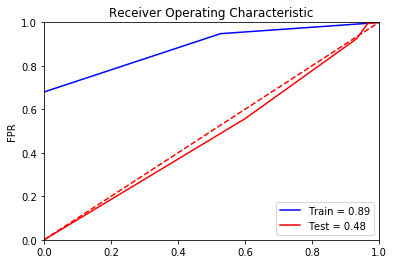

In [51]:
import sklearn.metrics as metrics

probs = knnbow.predict_proba(X_train)
preds = probs[:,1]
fpr_train, tpr_train, threshold = metrics.roc_curve(y_train, preds)
roc_auc_train = metrics.auc(fpr_train, tpr_train)

probs = knnbow.predict_proba(X_test)
preds = probs[:,1]
fpr_test, tpr_test, threshold = metrics.roc_curve(y_test, preds)
roc_auc_test = metrics.auc(fpr_test, tpr_test)

import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr_train, tpr_train, 'b', label = 'Train = %0.2f' %roc_auc_train)
plt.plot(fpr_test, tpr_test, 'r', label = 'Test = %0.2f' %roc_auc_test)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0,1], 'r--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.ylabel('TPR')
plt.ylabel('FPR')
plt.show()

### 2.4.1 Applying KNN brute force on BOW,<font color='red'> SET 1</font>

In [52]:
# Please write all the code with proper documentation
#As per graph best n = 15

#create model object
knnbow = KNeighborsClassifier(algorithm='brute', n_neighbors=3)
knnbow.fit(X_train, y_train)
y_pred = knnbow.predict(X_test)

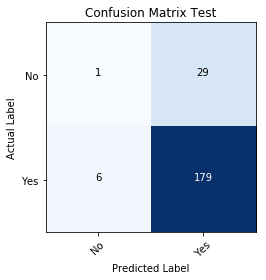

In [54]:
import itertools

def plot_confusion_matrix(cm, classes,title='Confusion Matrix', cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    
    fmt = 'd'
    thresh = cm.max()/2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt), horizontalalignment="center", color="white"
                if cm[i,j] > thresh else "black")
        
        plt.ylabel('Actual Label')
        plt.xlabel('Predicted Label')
        plt.tight_layout()

knnbow.fit(X_train, y_train)
y_pred_train = knnbow.predict(X_train)

cnf_matrix_train = confusion_matrix(y_train, y_pred_train)
np.set_printoptions(precision=2)

plt.figure()
plot_confusion_matrix(cnf_matrix_train, classes=['No', 'Yes'], title='Confusion Matrix Train')

cnf_matrix_test = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)

plt.figure()
plot_confusion_matrix(cnf_matrix_test, classes=['No', 'Yes'], title='Confusion Matrix Test')

### 2.4.2 Applying KNN brute force on TFIDF,<font color='red'> SET 2</font>

** Finding Best K Value for TF IDF Data **

In [55]:
X = hstack((categories_one_hot, sub_categories_one_hot, state_one_hot, teacher_prefix_one_hot, 
            project_grade_category_one_hot, text_tfidf, title_tfidf, price_standardized, quantity_standardized))

X_train, X_test, y_train, y_test = train_test_split(X, project_data['project_is_approved'], test_size=0.2, random_state=1)

In [56]:
#create model object
knntfidf = KNeighborsClassifier(algorithm='brute')

#create scorer inputs
scoring = {'AUC':'roc_auc', 'Accuracy': make_scorer(roc_auc_score)}

#The number of neighbors that we want to use to find best K
param_grid = {'n_neighbors': [1,2,3,4,5,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21]}
knntfidf = GridSearchCV(knntfidf, param_grid, cv=5, refit='AUC', return_train_score=True, scoring=scoring)
#fit model to data
knntfidf.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=KNeighborsClassifier(algorithm='brute', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'n_neighbors': [1, 2, 3, 4, 5, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21]},
       pre_dispatch='2*n_jobs', refit='AUC', return_train_score=True,
       scoring={'AUC': 'roc_auc', 'Accuracy': make_scorer(roc_auc_score)},
       verbose=0)

In [57]:
knntfidf.best_params_

{'n_neighbors': 17}

In [58]:
results = knntfidf.cv_results_

plt.figure(figsize=(10,10))
plt.title("TFIDF - Train CV Plot")

plt.xlabel('Hyper Parameters')
plt.ylabel('Accuracy Score')

ax = plt.gca()
ax.set_xlim(0,22)
ax.set_ylim(0.2, 1.1)

#Get the regular numpy array from the maskedArray
X_axis = np.array(results['param_n_neighbors'].data, dtype=float)

for scorer, color in zip(sorted(scoring), ['g', 'k']):
    for sample, style in (('train', '--'), ('test','-')):
        sample_score_mean = results['mean_%s_%s' %(sample, scorer)]
        sample_score_std = results['std_%s_%s' %(sample, scorer)]
        ax.fill_between(X_axis, sample_score_mean - sample_score_std,
                       sample_score_mean + sample_score_std,
                       alpha = 0.1 if sample == 'test' else 0, color=color)
        ax.plot(X_axis, sample_score_mean, style, color=color,
                       alpha = 1 if sample == 'test' else 0.7,  label = "%s (%s)" % (scorer, sample))
        
    best_index = np.nonzero(results['rank_test_%s' % scorer] == 1)[0][0]
    best_score = results['mean_test_%s' % scorer][best_index]
    
    #plot a dotted vertical line at the best score for that scorer marked by x
    ax.plot([X_axis[best_index], ] * 2, [0, best_score], 
            linestyle='-.', color=color, marker='x' , markeredgewidth=3, ms=8)
    
    ax.annotate("%0.2f" % best_score, (X_axis[best_index], best_score + 0.005))
    
plt.legend(loc="best")
plt.grid(False)
plt.show()

** ROC AUC Curve for TF IDF Data**

** Looking at graph best K is around 13 **

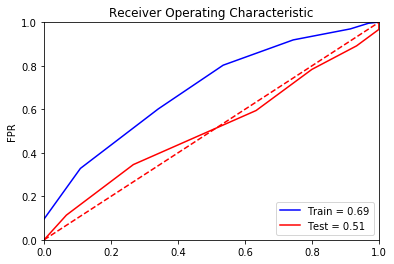

In [59]:
import sklearn.metrics as metrics

probs = knntfidf.predict_proba(X_train)
preds = probs[:,1]
fpr_train, tpr_train, threshold = metrics.roc_curve(y_train, preds)
roc_auc_train = metrics.auc(fpr_train, tpr_train)

probs = knntfidf.predict_proba(X_test)
preds = probs[:,1]
fpr_test, tpr_test, threshold = metrics.roc_curve(y_test, preds)
roc_auc_test = metrics.auc(fpr_test, tpr_test)

import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr_train, tpr_train, 'b', label = 'Train = %0.2f' %roc_auc_train)
plt.plot(fpr_test, tpr_test, 'r', label = 'Test = %0.2f' %roc_auc_test)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0,1], 'r--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.ylabel('TPR')
plt.ylabel('FPR')
plt.show()

** Confusion matrix for TF IDF Data **

In [62]:
# Please write all the code with proper documentation
#As per graph best n = 15

#create model object
knntfidf = KNeighborsClassifier(algorithm='brute', n_neighbors=17)
knntfidf.fit(X_train, y_train)
y_pred_train = knntfidf.predict(X_train)
y_pred_test = knntfidf.predict(X_test)

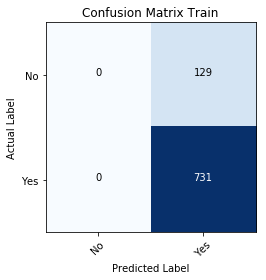

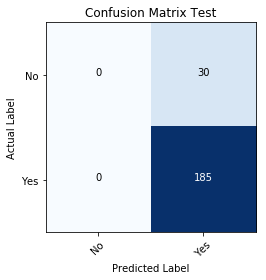

In [63]:
cnf_matrix_train = confusion_matrix(y_train, y_pred_train)
np.set_printoptions(precision=2)

plt.figure()
plot_confusion_matrix(cnf_matrix_train, classes=['No', 'Yes'], title='Confusion Matrix Train')

cnf_matrix_test = confusion_matrix(y_test, y_pred_test)
np.set_printoptions(precision=2)

plt.figure()
plot_confusion_matrix(cnf_matrix_test, classes=['No', 'Yes'], title='Confusion Matrix Test')

### 2.4.3 Applying KNN brute force on AVG W2V,<font color='red'> SET 3</font>

In [64]:
X = hstack((categories_one_hot, sub_categories_one_hot, state_one_hot, teacher_prefix_one_hot, 
            project_grade_category_one_hot, avg_w2v_vectors, avg_w2v_vectors_title, price_standardized, quantity_standardized))

X_train, X_test, y_train, y_test = train_test_split(X, project_data['project_is_approved'], test_size=0.2, random_state=1)

In [65]:
#create model object
knnavgw2v = KNeighborsClassifier(algorithm='brute')

#create scorer inputs
scoring = {'AUC':'roc_auc', 'Accuracy': make_scorer(roc_auc_score)}

#The number of neighbors that we want to use to find best K
param_grid = {'n_neighbors': [1,2,3,4,5,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21]}
knnavgw2v = GridSearchCV(knnavgw2v, param_grid, cv=5, refit='AUC', return_train_score=True, scoring=scoring)
#fit model to data
knnavgw2v.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=KNeighborsClassifier(algorithm='brute', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'n_neighbors': [1, 2, 3, 4, 5, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21]},
       pre_dispatch='2*n_jobs', refit='AUC', return_train_score=True,
       scoring={'AUC': 'roc_auc', 'Accuracy': make_scorer(roc_auc_score)},
       verbose=0)

** ROC AUC Curve for AVG W2V **

In [66]:
knnavgw2v.best_params_

{'n_neighbors': 1}

In [67]:
results = knnavgw2v.cv_results_

plt.figure(figsize=(10,10))
plt.title("avgw2v - Train CV Plot")

plt.xlabel('Hyper Parameters')
plt.ylabel('Accuracy Score')

ax = plt.gca()
ax.set_xlim(0,22)
ax.set_ylim(0.2, 1.1)

#Get the regular numpy array from the maskedArray
X_axis = np.array(results['param_n_neighbors'].data, dtype=float)

for scorer, color in zip(sorted(scoring), ['g', 'k']):
    for sample, style in (('train', '--'), ('test','-')):
        sample_score_mean = results['mean_%s_%s' %(sample, scorer)]
        sample_score_std = results['std_%s_%s' %(sample, scorer)]
        ax.fill_between(X_axis, sample_score_mean - sample_score_std,
                       sample_score_mean + sample_score_std,
                       alpha = 0.1 if sample == 'test' else 0, color=color)
        ax.plot(X_axis, sample_score_mean, style, color=color,
                       alpha = 1 if sample == 'test' else 0.7,  label = "%s (%s)" % (scorer, sample))
        
    best_index = np.nonzero(results['rank_test_%s' % scorer] == 1)[0][0]
    best_score = results['mean_test_%s' % scorer][best_index]
    
    #plot a dotted vertical line at the best score for that scorer marked by x
    ax.plot([X_axis[best_index], ] * 2, [0, best_score], 
            linestyle='-.', color=color, marker='x' , markeredgewidth=3, ms=8)
    
    ax.annotate("%0.2f" % best_score, (X_axis[best_index], best_score + 0.005))
    
plt.legend(loc="best")
plt.grid(False)
plt.show()

** ROC AUC Curve for avg w2v **

In [68]:
import sklearn.metrics as metrics

probs = knnavgw2v.predict_proba(X_train)
preds = probs[:,1]
fpr_train, tpr_train, threshold = metrics.roc_curve(y_train, preds)
roc_auc_train = metrics.auc(fpr_train, tpr_train)

probs = knnavgw2v.predict_proba(X_test)
preds = probs[:,1]
fpr_test, tpr_test, threshold = metrics.roc_curve(y_test, preds)
roc_auc_test = metrics.auc(fpr_test, tpr_test)

import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr_train, tpr_train, 'b', label = 'Train = %0.2f' %roc_auc_train)
plt.plot(fpr_test, tpr_test, 'r', label = 'Test = %0.2f' %roc_auc_test)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0,1], 'r--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.ylabel('TPR')
plt.ylabel('FPR')
plt.show()

** Confusion Matrix for avg w2v **

In [69]:
# Please write all the code with proper documentation

#create model object
knnavgw2v = KNeighborsClassifier(algorithm='brute', n_neighbors=15)
knnavgw2v.fit(X_train, y_train)
y_pred_test = knnavgw2v.predict(X_test)
y_pred_train = knnavgw2v.predict(X_train)

In [70]:
cnf_matrix_train = confusion_matrix(y_train, y_pred_train)
np.set_printoptions(precision=2)

plt.figure()
plot_confusion_matrix(cnf_matrix_train, classes=['No', 'Yes'], title='Confusion Matrix Train')

cnf_matrix_test = confusion_matrix(y_test, y_pred_test)
np.set_printoptions(precision=2)

plt.figure()
plot_confusion_matrix(cnf_matrix_test, classes=['No', 'Yes'], title='Confusion Matrix')

### 2.4.4 Applying KNN brute force on TFIDF W2V,<font color='red'> SET 4</font>

** Find Best K for TFIDF W2V **

In [71]:
X = hstack((categories_one_hot, sub_categories_one_hot, state_one_hot, teacher_prefix_one_hot, 
            project_grade_category_one_hot, tfidf_w2v_vectors, tfidf_w2v_vectors_title, price_standardized, quantity_standardized))

X_train, X_test, y_train, y_test = train_test_split(X, project_data['project_is_approved'], test_size=0.2, random_state=1)


In [72]:
knntfidfw2v = KNeighborsClassifier(algorithm='brute')

#create scorer inputs
scoring = {'AUC':'roc_auc', 'Accuracy': make_scorer(roc_auc_score)}

#The number of neighbors that we want to use to find best K
param_grid = {'n_neighbors': [1,2,3,4,5,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21]}
knntfidfw2v = GridSearchCV(knntfidfw2v, param_grid, cv=5, refit='AUC', return_train_score=True, scoring=scoring)
#fit model to data
knntfidfw2v.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=KNeighborsClassifier(algorithm='brute', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'n_neighbors': [1, 2, 3, 4, 5, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21]},
       pre_dispatch='2*n_jobs', refit='AUC', return_train_score=True,
       scoring={'AUC': 'roc_auc', 'Accuracy': make_scorer(roc_auc_score)},
       verbose=0)

In [73]:
knntfidfw2v.best_params_

{'n_neighbors': 7}

In [74]:
results = knntfidfw2v.cv_results_

plt.figure(figsize=(10,10))
plt.title("avgw2v - Train CV Plot")

plt.xlabel('Hyper Parameters')
plt.ylabel('Accuracy Score')

ax = plt.gca()
ax.set_xlim(0,22)
ax.set_ylim(0.2, 1.1)

#Get the regular numpy array from the maskedArray
X_axis = np.array(results['param_n_neighbors'].data, dtype=float)

for scorer, color in zip(sorted(scoring), ['g', 'k']):
    for sample, style in (('train', '--'), ('test','-')):
        sample_score_mean = results['mean_%s_%s' %(sample, scorer)]
        sample_score_std = results['std_%s_%s' %(sample, scorer)]
        ax.fill_between(X_axis, sample_score_mean - sample_score_std,
                       sample_score_mean + sample_score_std,
                       alpha = 0.1 if sample == 'test' else 0, color=color)
        ax.plot(X_axis, sample_score_mean, style, color=color,
                       alpha = 1 if sample == 'test' else 0.7,  label = "%s (%s)" % (scorer, sample))
        
    best_index = np.nonzero(results['rank_test_%s' % scorer] == 1)[0][0]
    best_score = results['mean_test_%s' % scorer][best_index]
    
    #plot a dotted vertical line at the best score for that scorer marked by x
    ax.plot([X_axis[best_index], ] * 2, [0, best_score], 
            linestyle='-.', color=color, marker='x' , markeredgewidth=3, ms=8)
    
    ax.annotate("%0.2f" % best_score, (X_axis[best_index], best_score + 0.005))
    
plt.legend(loc="best")
plt.grid(False)
plt.show()

** ROC AUC Curve for TFIDF W2V **

In [75]:

probs = knntfidfw2v.predict_proba(X_train)
preds = probs[:,1]
fpr_train, tpr_train, threshold = metrics.roc_curve(y_train, preds)
roc_auc_train = metrics.auc(fpr_train, tpr_train)

probs = knntfidfw2v.predict_proba(X_test)
preds = probs[:,1]
fpr_test, tpr_test, threshold = metrics.roc_curve(y_test, preds)
roc_auc_test = metrics.auc(fpr_test, tpr_test)

import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr_train, tpr_train, 'b', label = 'Train = %0.2f' %roc_auc_train)
plt.plot(fpr_test, tpr_test, 'r', label = 'Test = %0.2f' %roc_auc_test)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0,1], 'r--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.ylabel('TPR')
plt.ylabel('FPR')
plt.show()

** Confusion Matrix for TFIDF W2V **

In [71]:
# Please write all the code with proper documentation
#As per graph best n = 20 however taking 19 as odd numbers are preferred

#create model object
knntfidfw2v = KNeighborsClassifier(algorithm='brute', n_neighbors=7)
knntfidfw2v.fit(X_train, y_train)
y_pred_test = knntfidfw2v.predict(X_test)
y_pred_train = knntfidfw2v.predict(X_train)

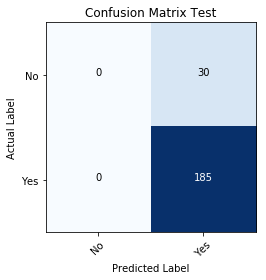

In [76]:
cnf_matrix_train = confusion_matrix(y_train, y_pred_train)
np.set_printoptions(precision=2)

plt.figure()
plot_confusion_matrix(cnf_matrix_train, classes=['No', 'Yes'], title='Confusion Matrix Train')

cnf_matrix = confusion_matrix(y_test, y_pred_test)
np.set_printoptions(precision=2)

plt.figure()
plot_confusion_matrix(cnf_matrix_test, classes=['No', 'Yes'], title='Confusion Matrix Test')

<h2>2.5 Feature selection with `SelectKBest` </h2>

In [77]:
#Taking again TFIDF data to find best K
X = hstack((categories_one_hot, sub_categories_one_hot, state_one_hot, teacher_prefix_one_hot, 
            project_grade_category_one_hot, text_tfidf, title_tfidf, price_standardized, quantity_standardized))

X_train, X_test, y_train, y_test = train_test_split(X, project_data['project_is_approved'], test_size=0.2, random_state=1)

In [78]:
X_train.shape

(860, 1921)

In [79]:
# please write all the code with proper documentation, and proper titles for each subsection
# go through documentations and blogs before you start coding
# first figure out what to do, and then think about how to do.
# reading and understanding error messages will be very much helpfull in debugging your code

# when you plot any graph make sure you use 
    # a. Title, that describes your plot, this will be very helpful to the reader
    # b. Legends if needed
    # c. X-axis label
    # d. Y-axis label

from sklearn.feature_selection import SelectKBest, f_classif
X_best = SelectKBest(f_classif, k=1000)
X_best_train = X_best.fit_transform(X_train, y_train)
print(X_best_train.shape)

X_best_test = X_best.transform(X_test)
print(X_best_test.shape)

(860, 1000)
(215, 1000)


In [80]:
knnBestK = KNeighborsClassifier(algorithm='brute')

#create scorer inputs
scoring = {'AUC':'roc_auc', 'Accuracy': make_scorer(roc_auc_score)}

#The number of neighbors that we want to use to find best K
param_grid = {'n_neighbors': [1,2,3,4,5,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21]}
knnBestK = GridSearchCV(knnBestK, param_grid, cv=5, refit='AUC', return_train_score=True, scoring=scoring)
#fit model to data
knnBestK.fit(X_best_train, y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=KNeighborsClassifier(algorithm='brute', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'n_neighbors': [1, 2, 3, 4, 5, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21]},
       pre_dispatch='2*n_jobs', refit='AUC', return_train_score=True,
       scoring={'AUC': 'roc_auc', 'Accuracy': make_scorer(roc_auc_score)},
       verbose=0)

In [81]:
knnBestK.best_params_

{'n_neighbors': 8}

In [82]:
results = knnBestK.cv_results_

plt.figure(figsize=(10,10))
plt.title("avgw2v - Train CV Plot")

plt.xlabel('Hyper Parameters')
plt.ylabel('Accuracy Score')

ax = plt.gca()
ax.set_xlim(0,22)
ax.set_ylim(0.2, 1.1)

#Get the regular numpy array from the maskedArray
X_axis = np.array(results['param_n_neighbors'].data, dtype=float)

for scorer, color in zip(sorted(scoring), ['g', 'k']):
    for sample, style in (('train', '--'), ('test','-')):
        sample_score_mean = results['mean_%s_%s' %(sample, scorer)]
        sample_score_std = results['std_%s_%s' %(sample, scorer)]
        ax.fill_between(X_axis, sample_score_mean - sample_score_std,
                       sample_score_mean + sample_score_std,
                       alpha = 0.1 if sample == 'test' else 0, color=color)
        ax.plot(X_axis, sample_score_mean, style, color=color,
                       alpha = 1 if sample == 'test' else 0.7,  label = "%s (%s)" % (scorer, sample))
        
    best_index = np.nonzero(results['rank_test_%s' % scorer] == 1)[0][0]
    best_score = results['mean_test_%s' % scorer][best_index]
    
    #plot a dotted vertical line at the best score for that scorer marked by x
    ax.plot([X_axis[best_index], ] * 2, [0, best_score], 
            linestyle='-.', color=color, marker='x' , markeredgewidth=3, ms=8)
    
    ax.annotate("%0.2f" % best_score, (X_axis[best_index], best_score + 0.005))
    
plt.legend(loc="best")
plt.grid(False)
plt.show()

In [83]:
tfidfBestFeatures = KNeighborsClassifier(n_neighbors=7, algorithm='brute')
tfidfBestFeatures.fit(X_best_train, y_train)
y_pred = tfidfBestFeatures.predict(X_best_test)

In [84]:
probs = tfidfBestFeatures.predict_proba(X_best_train)
preds = probs[:,1]
fpr_train, tpr_train, threshold = metrics.roc_curve(y_train, preds)
roc_auc_train = metrics.auc(fpr_train, tpr_train)

probs = tfidfBestFeatures.predict_proba(X_best_test)
preds = probs[:,1]
fpr_test, tpr_test, threshold = metrics.roc_curve(y_test, preds)
roc_auc_test = metrics.auc(fpr_test, tpr_test)

import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr_train, tpr_train, 'b', label = 'Train = %0.2f' %roc_auc_train)
plt.plot(fpr_test, tpr_test, 'r', label = 'Test = %0.2f' %roc_auc_test)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0,1], 'r--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.ylabel('TPR')
plt.ylabel('FPR')
plt.show()

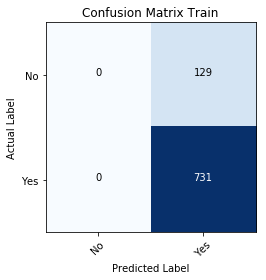

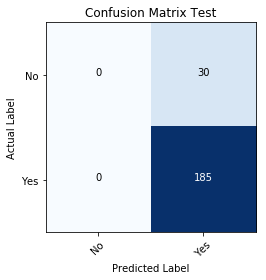

In [85]:
#create model object
bestFit = KNeighborsClassifier(algorithm='brute', n_neighbors=21)
bestFit.fit(X_best_train, y_train)
y_pred_test = bestFit.predict(X_best_test)
y_pred_train = bestFit.predict(X_best_train)

cnf_matrix_train = confusion_matrix(y_train, y_pred_train)
np.set_printoptions(precision=2)

plt.figure()
plot_confusion_matrix(cnf_matrix_train, classes=['No', 'Yes'], title='Confusion Matrix Train')

cnf_matrix_test = confusion_matrix(y_test, y_pred_test)
np.set_printoptions(precision=2)

plt.figure()
plot_confusion_matrix(cnf_matrix_test, classes=['No', 'Yes'], title='Confusion Matrix Test')

# Note

## 1. The code for Cross validation and plot is referred from various sites however, the main reference has been the official sklearn website

## 2. The Test Legend in cross validation plots refers to cross validation data and not the test data

## 3. Have taken less number of records as my RAM is only 6GB

## 4. Eventhough you will see a higher number printed as 'Best Param', have considered cross validation Graph to pick the best odd number as hyper parameter

<h1>3. Conclusions</h1>

In [86]:
from prettytable import PrettyTable
    
x = PrettyTable()

x.field_names = ["Vectorizer", "Model", "Hyper Parameter", "AUC"]

x.add_row(["BOW", "Brute", 3, 0.51])
x.add_row(["TFIDF", "Brute", 17, 0.5])
x.add_row(["W2V", "Brute", 15, 0.56])
x.add_row(["TFIDF W2V", "Brute", 7, 0.48])

print(x)

+------------+-------+-----------------+------+
| Vectorizer | Model | Hyper Parameter | AUC  |
+------------+-------+-----------------+------+
|    BOW     | Brute |        3        | 0.51 |
|   TFIDF    | Brute |        17       | 0.5  |
|    W2V     | Brute |        15       | 0.56 |
| TFIDF W2V  | Brute |        7        | 0.48 |
+------------+-------+-----------------+------+


** Model Inrefence **

Considering above table, there is no significat different among models with TFIDF W2V providing best result